# SPARK INTERN FEB 2021

Author Name : ABIRAMI B

# Prediction using UnSupervised Machine Learning:

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Loading necessary Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset:
data = pd.read_csv('Iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# To build a unsupervised model for the above dataset:
# we can drop feature "Species"
dt = data.drop('Species',axis = 1)
dt.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [4]:
# To find the number of samples and features in the dataset:
dt.shape

(150, 5)

In [5]:
# To find the features in the dataset:
dt.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [6]:
# To find the datatypes:
dt.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [7]:
# In the above dataset id is unique in nature. so we can set it as index.
dt.set_index('Id',inplace = True)

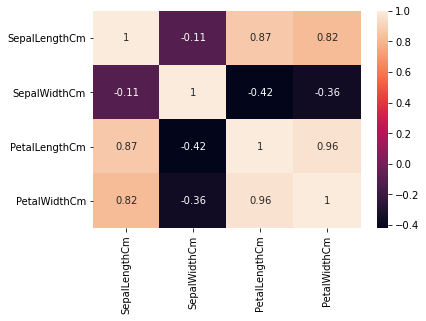

In [8]:
# To find the correlation heatmap is used:
sns.heatmap(dt.corr(),annot = True)
plt.show()

In [9]:
# To check for null values:
dt.isnull().sum()

# In the above dataset there is no null values. so we can proceed building unsupervised machine learning model.

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [10]:
# Before building model scale the data:(mandatory for USL)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dt_sc = sc.fit_transform(dt)

dt_sc = pd.DataFrame(dt_sc,columns = dt.columns,index = dt.index)
dt_sc.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,-0.900681,1.032057,-1.341272,-1.312977
2,-1.143017,-0.124958,-1.341272,-1.312977
3,-1.385353,0.337848,-1.398138,-1.312977
4,-1.506521,0.106445,-1.284407,-1.312977
5,-1.021849,1.263460,-1.341272,-1.312977


**Finding the best K value:**

1. Finding K through ELBOW CURVE method:

600.0000000000003
223.73200573676343
140.96581663074699
114.42970777082239
91.14860119459554
80.23060704506956
70.9396437275681
62.967584883250325
55.70641053075772


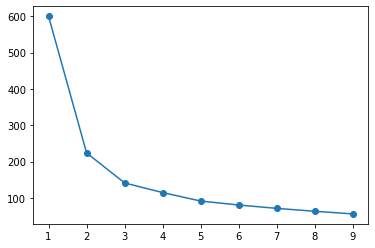

In [15]:
# To find the optimum number of cluster(value of k):
from sklearn.cluster import KMeans

wcsse = []

cl = [1,2,3,4,5,6,7,8,9]

for i in cl:
    mod = KMeans(n_clusters = i,random_state = 0)
    mod.fit(dt_sc)
    
    wcsse.append(mod.inertia_)
    print(mod.inertia_)
    
# To plot ELBOW curve:
plt.plot(cl,wcsse,'o-')
plt.show()

In [12]:
# From the above ELBOW CURVE method, we can conclude that after the point when k = 2, 
# there is no significant change in the curve.

2. Finding K through silhouette Score method

In [16]:
# Through silhouette score analysis finding k value to build unsupervised model:
from sklearn.metrics import silhouette_score

sil = []

cl = [2,3,4,5,6,7,8,9]

for i in cl:
    mod = KMeans(n_clusters = i,random_state = 0)
    mod.fit(dt_sc)
    sil.append(silhouette_score(dt_sc,mod.labels_))
    
print(sil)

[0.580184463257396, 0.4589717867018717, 0.3887799827106933, 0.3497022541354177, 0.3280024531229049, 0.32508972280401244, 0.33618236203354407, 0.33313906243527525]


In [22]:
# From the above silhouette analysis we obtained higher silhouette score when k = 2.

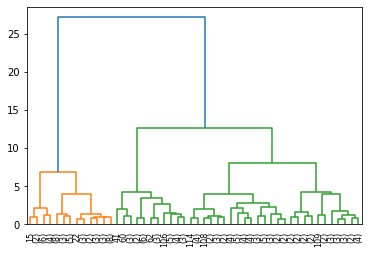

In [17]:
# To find the value of k using Dendrogram:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

merge_ward = linkage(dt_sc,method = 'ward')

dendrogram(merge_ward,truncate_mode = 'lastp',p = 50)
plt.show()

In [ ]:
# From the above dendrogram method, we can conclude that for the number of cluster as 2 it covers a large distance when compared
# to cluster as 3.

**BUILDING K-MEANS CLUSTERING ALGORITHM:**

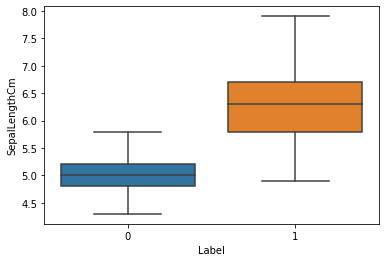

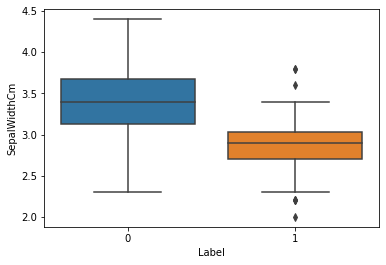

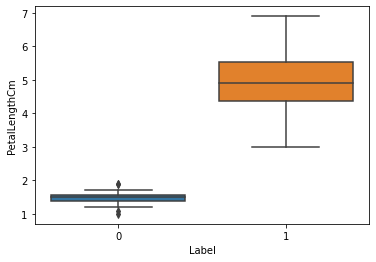

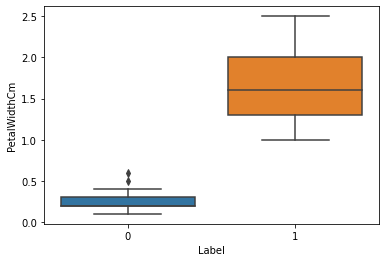

In [24]:
# plotting the interpretation for cluster as 2:
clus_mod = KMeans(n_clusters = 2,random_state = 0, max_iter = 1000)

clus_mod.fit(dt_sc)
label = clus_mod.labels_

dt['Label'] = label

for i in dt.drop('Label',axis = 1):
    sns.boxplot(dt['Label'],dt[i])
    plt.show()

In [24]:
# so we can conclude that if we build a model with number of cluster as 2 form a two unique cluster.

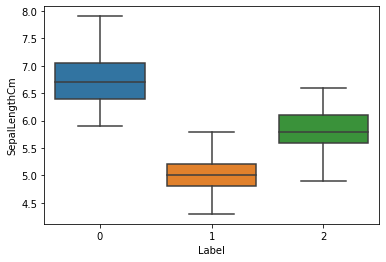

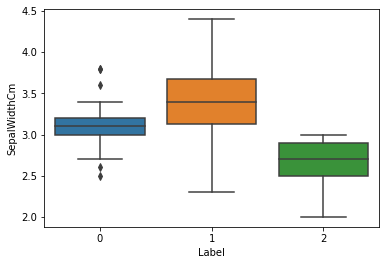

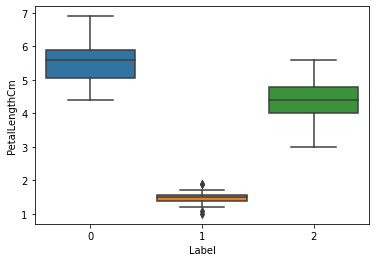

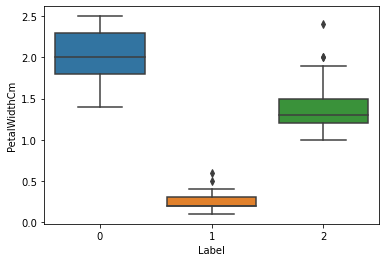

In [25]:
# plotting the interpretation for cluster as 3:
clus_mod = KMeans(n_clusters = 3,random_state = 0, max_iter = 1000)

clus_mod.fit(dt_sc)
label = clus_mod.labels_

dt['Label'] = label

for i in dt.drop('Label',axis = 1):
    sns.boxplot(dt['Label'],dt[i])
    plt.show()

In [ ]:
# so we can conclude that if we build a model with number of cluster as 3 form a three unique cluster for all feature other than
# "SepalWidthCm". So we can build usl model with either number of cluster as 2 or number of cluster as 3.

# Cross verifying this with PCA Analysis.

Plotting cluster through PCA:

In [13]:
from sklearn.decomposition import PCA
pca=PCA()
pcadata=pca.fit_transform(dt_sc)

In [19]:
pcadata1=pd.DataFrame(pcadata)
pcadata1['label']=label

In [20]:
cent=pcadata1.groupby('label').mean()
cent

,0,1,2,3
label,,,,
0,1.722369,0.599905,-0.010622,-0.019998
1,-2.220193,0.292225,-0.043955,-0.017916
2,0.567138,-0.807675,0.050886,0.034636


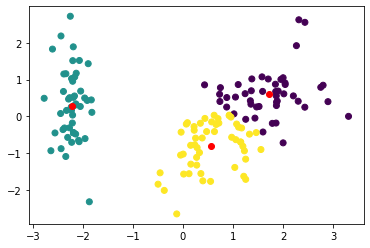

In [21]:
plt.scatter(pcadata1[0],pcadata1[1],c=label)
plt.scatter(cent.iloc[0,0],cent.iloc[0,1],color='red')
plt.scatter(cent.iloc[1,0],cent.iloc[1,1],color='red')
plt.scatter(cent.iloc[2,0],cent.iloc[2,1],color='red')

In [ ]:
# PCA is mainly for dimensionality reduction. It internally treat outlier data. From the above plot we can conclude that
# building model with number of cluster as 3 result in good quality model.